### **Projeto**:

Nós atuaremos como cientistas de dados em uma **consultoria** que presta serviços para diversas empresas. Atualmente, estamos acompanhando uma **rede de varejo** que atende todo o Brasil. Nosso objetivo é, por meio da **estatística e da análise de dados**, responder diversos casos que auxiliarão na **tomada de decisão** e na geração de **insights** para esses clientes. Faremos isso utilizando dados coletados de diversos setores dessa empresa, como **RH**, **vendas**, **marketing** e **financeiro**. Nós iremos:

- Identificar tipos de dados

- Explorar problemas

- Aplicar medidas

- Gerar insights

- Levantar hipóteses

In [1]:
import pandas as pd

Realizando a leitura da nossa primeira base de dados para a análise do perfil da nossa clientela de acordo, com as compras que realizaram.

In [2]:
#importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv'
#lendo os dados
df = pd.read_csv(url)

In [3]:
#visualizando as primeiras linhas de df
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [4]:
#verificando a quantidade de linhas e colunas do df
df.shape

(200000, 10)

In [5]:
#verificar informações mais detalhadas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


Iremos realizar uma análise simples, investigando uma variável **qualitativa nominal** como, por exemplo, a quantidade de vendas por categoria

In [6]:
#visualizando a coluna de categoria
df['categoria_produto']

0              Ferramentas e Construção
1                   Alimentos e Bebidas
2                           Eletrônicos
3                           Eletrônicos
4                Papelaria e Escritório
                      ...              
199995                      Eletrônicos
199996                      Eletrônicos
199997    Roupas, Calçados e Acessórios
199998              Alimentos e Bebidas
199999       Beleza e Cuidados Pessoais
Name: categoria_produto, Length: 200000, dtype: object

In [7]:
#utilizando a função unique() para mostrar apenas uma categoria de produto por vez
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

In [8]:
#verificar a quantidade de vendas por categoria
df['categoria_produto'].value_counts()

categoria_produto
Eletrônicos                      36060
Roupas, Calçados e Acessórios    27917
Casa e Mobílias                  26015
Beleza e Cuidados Pessoais       22026
Esporte e Lazer                  19939
Alimentos e Bebidas              18022
Papelaria e Escritório           13936
Livros                           13790
Ferramentas e Construção         12063
Brinquedos                       10232
Name: count, dtype: int64

In [9]:
#para plotar devemos tornar a coluna em DataFrame
produtos = df['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


In [10]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

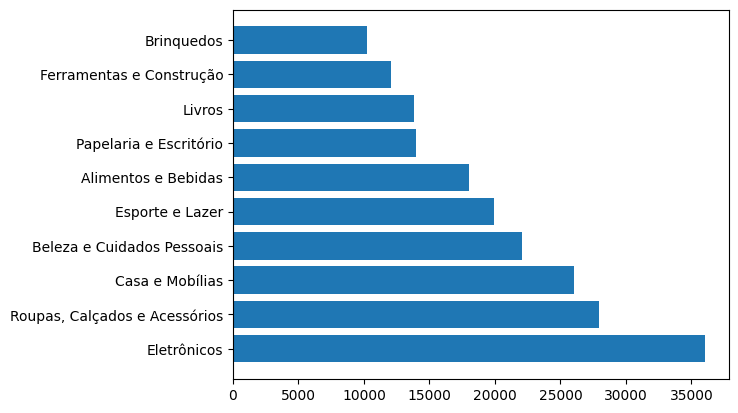

In [11]:
#plotando gráfico em barras na horizontal
plt.barh(produtos['categoria_produto'], produtos['count'])
plt.show

### **Manipulando dados qualitativos ordinais**

In [12]:
#ordenando os dados
sorted(df['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

#### **O que é o Categorical**?

Em Python, o **Categorical** do pandas é usado para representar **variáveis categóricas**. Ele permite armazenar as categorias de forma eficiente e, no caso de **variáveis ordinais**, definir uma ordem específica para elas. Isso facilita a **manipulação e análise dos dados**.

*Exemplo*:

Uma empresa realiza uma pesquisa de satisfação com clientes e coleta os seguintes dados:

**cliente_id**: Número de identificação do cliente **(nominal)**.
**nivel_satisfacao**: Respostas codificadas como 1 (Insatisfeito), 2 (Neutro), 3 (Satisfeito) **(ordinal)**.

O objetivo é transformar essas variáveis corretamente utilizando **Categorical** e visualizar a alteração. Podemos fazer isso da seguinte forma:

- DataFrame de exemplo\
dados = pd.DataFrame({\
    'cliente_id': [101, 102, 103, 104, 105],\
    'nivel_satisfacao': [3, 2, 1, 3, 2]\
})

-  Convertendo nivel_satisfacao em uma categoria ordinal\
dados['nivel_satisfacao'] = pd.Categorical(\
    dados['nivel_satisfacao'],\
    categories=[1, 2, 3],\
    ordered=True\
)

avaliacao_labels = {1: 'Insatisfeito', 2: 'Neutro', 3: 'Satisfeito'}\
dados['nivel_satisfacao'] = dados['nivel_satisfacao'].map(avaliacao_labels)

-  Ordenando os dados pela coluna 'nivel_satisfacao'\
dados_sorted = dados.sort_values('nivel_satisfacao', ascending=False)

dados_sorted

O **Categorical** pode auxiliar em diversas situações na ciência de dados e análise com Python, como:

- **Análise Estatística**: Para definir variáveis categóricas e quais estatísticas descritivas aplicar nesses casos.
- **Visualização de Dados**: Facilita a criação de gráficos categóricos, como gráficos de barras, usando bibliotecas como Matplotlib e Seaborn.
- **Machine Learning**: Prepara variáveis categóricas para algoritmos que não aceitam dados numéricos diretamente.
- **Manipulação de Dados**: Permite ordenações e agrupamentos em tabelas e relatórios.

Logo, transformar variáveis numéricas que expressam variáveis categóricas em Categorical garante maior precisão e facilita a interpretação em análises qualitativas.

In [13]:
#criando uma coluna categórica
df['avaliacao indicador'] = pd.Categorical(
    df['avaliacao'],
    categories = [1, 2, 3, 4, 5],
    ordered=True
)

In [14]:
#realizando o mapeamento 
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}
df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)

In [15]:
#visualizando
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [16]:
#removendo os valores duplicados
df_unico = df[['avaliacao', 'avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


#### **Diferenciando dados discretos e contínuos**

- **Discretos**: valores inteiros e contáveis *(Ex: quantidade de produto)*
- **Contínuos**: qualquer valor em um intervalo *(Ex: altura de pessoas)*

In [17]:
#verificando os valores únicos da coluna quantidade
df['quantidade'].unique()

array([ 2,  1,  8,  5,  3,  7,  6,  4, 10,  9])

Verificamos que essa variá do tipo **discreto**

In [18]:
#passando a mensagem que será exibida
print(f"Vendemos de {min(df['quantidade'])} até {max(df['quantidade'])} unidades de produto por registro")

Vendemos de 1 até 10 unidades de produto por registro


In [19]:
#verificando os valores da coluna total_compra
df['total_compra'].unique()

array([  193.6 ,   247.68,  1254.92, ..., 13183.8 ,  1666.33,  1193.03],
      shape=(141854,))

Nesse caso, essa variável é do tipo **contínuo**

In [20]:
#exibindo a mensagem
print(f"Tivemos vendas a partir de R$ {min(df['total_compra']):,.2f} até R$ {max(df['total_compra']):,.2f}")

Tivemos vendas a partir de R$ 5.05 até R$ 20,744.70


In [21]:
#podemos ordenar o DataFrame para identificar também o velor mínimo e máximo
df.sort_values(by='total_compra')

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
157075,b866504d-9fe1-4c75-8956-decf7f25dd75,Masculino,35,Sudeste,Papelaria e Escritório,5.05,1,5.05,13,4,Bom
4562,5a66b58a-2ab0-49c3-b597-f45846130ded,Feminino,37,Norte,Papelaria e Escritório,5.14,1,5.14,11,2,Ruim
6279,c67e996c-403c-4f58-81c5-996c1ab676a5,Masculino,34,Sul,Papelaria e Escritório,5.28,1,5.28,7,3,Regular
50155,e7ad75b4-6a0e-4609-801c-ef12adeb837a,Masculino,55,Sudeste,Papelaria e Escritório,5.35,1,5.35,11,5,Ótimo
85703,ed88c6a2-2fdd-4278-bfa8-fd54f7e2f357,Feminino,42,Centro-Oeste,Papelaria e Escritório,5.78,1,5.78,16,4,Bom
...,...,...,...,...,...,...,...,...,...,...,...
88073,5f125e88-f01c-4499-9a25-c4910bc76dee,Masculino,39,Nordeste,Eletrônicos,2037.44,10,20374.40,7,2,Ruim
134287,2c3853dc-b9dc-400a-bd70-ff2521fe4d8a,Feminino,35,Sul,Eletrônicos,2057.76,10,20577.60,6,2,Ruim
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10,20581.80,4,5,Ótimo
114561,dc3c4162-5772-480e-b7fa-0ccc41d78a40,Feminino,29,Sudeste,Eletrônicos,2058.77,10,20587.70,6,5,Ótimo


### Demanda 1: **Acompanhamento das avaliações dos clientes**

A empresa que acompanhar as **avaliações dos clientes** sobre seus produtos a fim de priorizar ações, como melhorar produtos com maior proporção
de feedbacks negativos, investigar causas e explorar pontos fortes apontados pelos clientes satisfeitos. Essas avaliações variam entre:

1. Péssimo
2. Ruim
3. Regular
4. Bom
5. Ótimo

Como a **equipe de marketing e vendas** poderá investigar a percepção geral dos clientes sobre os produtos e identificar possíveis comportamentos
para ajustar suas estratégias de comunicação e melhoria de produtos?

### Solução:

#### **Distribuição de frequência**

Para essa análise, utilizaremos a **distribuição de frequência**, que mostra a quantidade de vezes que uma variável ocorre. Por exemplo, para saber **quantas vezes a avaliação "péssima" foi registrada**, **ordenamos os valores**, **determinamos a frequência** e **agrupamos os dados por categorias**.

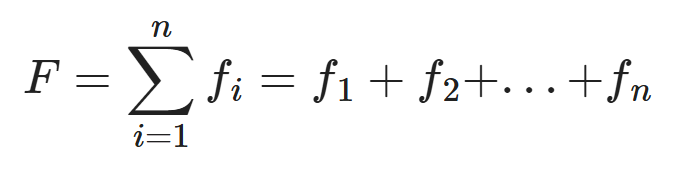

- **Fórmula matemática de frequência absoluta**: A expressão indica que F igual a iniciaSomatório de i igual a 1 até n de f índice i fimSomatório igual a f índice 1 somado a f índice 2 somado a reticências somado a f índice n.



In [22]:
#visualizar a estrutura dos dados
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [23]:
#criando novo DataFrame recebendo a frequência
freq_avaliacoes = (df.groupby('avaliacao indicador', observed=False)
                  .size()
                  .reset_index(name='freq_absoluta')
                  .sort_values(by='avaliacao indicador', ascending=False))
#visualizando o novo DataFrame
freq_avaliacoes

,avaliacao indicador,freq_absoluta
4,Ótimo,66076
3,Bom,40980
2,Regular,32282
1,Ruim,28239
0,Péssimo,32423


#### **Frequência Relativa**

Para obter esse resultado de maneira ainda mais clara através da **frequência relativa**.

- Ela é dada pela razão entre a frequência absoluta de cada classe e a frequência total ou soma das frequências absolutas:

  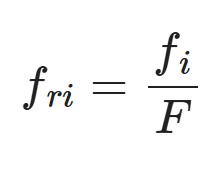

Para valores percentuais, basta multiplicar cada frequência relativa por 100.

In [24]:
#criando a frequência relativa
freq_avaliacoes['freq_relativa'] = round((freq_avaliacoes['freq_absoluta'] / freq_avaliacoes['freq_absoluta'].sum()) * 100, 1)

In [25]:
freq_avaliacoes

,avaliacao indicador,freq_absoluta,freq_relativa
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [26]:
#renomeando as colunas
freq_avaliacoes.columns = ['Avaliação', 'Quantidade', 'Porcentagem (%)']

In [27]:
freq_avaliacoes

,Avaliação,Quantidade,Porcentagem (%)
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [28]:
import seaborn as sns

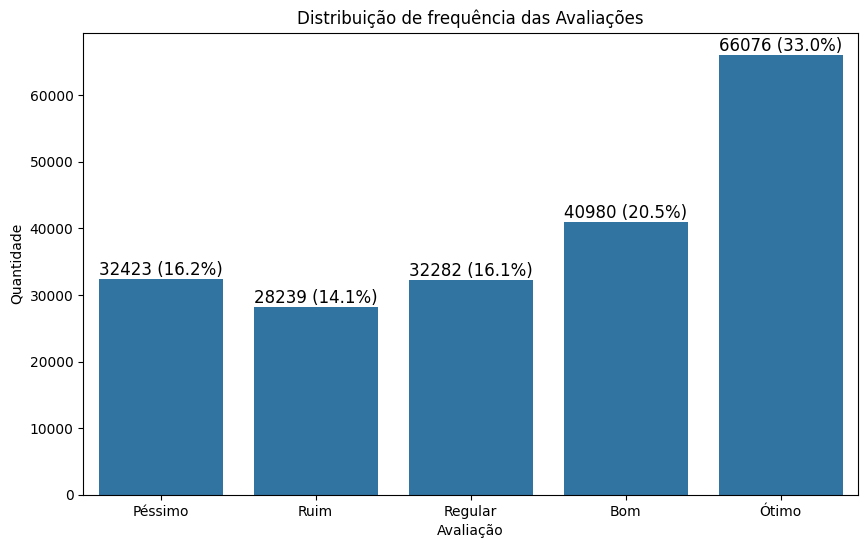

In [29]:
#plotando gráfico para visualizar os dados
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_avaliacoes, x='Avaliação', y='Quantidade')

#adicionando título e rótulos aos eixos
plt.title('Distribuição de frequência das Avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')

#adicionando os rótulos com valores de frequência e porcentagem
for index, row in freq_avaliacoes.iterrows():
    plt.text(index, row['Quantidade'] + 0.1, f"{row['Quantidade']} ({row['Porcentagem (%)']:.1f}%)",
             ha='center', va='bottom', fontsize=12)

plt.show()

### Demanda 2: **Analisando as avaliações por região**

A equipe de marketing e vendas trouxe uma nova demanda para a análise das avaliações. Além de entender o comportamento geral das avaliações, que foi, o que fizemos anteriormente, agora eles desejam saber como essas avaliações variam conforme a **região do país**.

Nosso objetivo é identificar como as percepções dos clientes variam **regionalmente**, respondendo a questão como:

- Qual região tem mais avaliações positivas?

- Alguma região concentra a maior parte das avaliações negativas?

- Existe alguma diferença relevante que indique a necessidade de ações específicas para algumas regiões?

### **Solução**:

#### **Tabela de Contigência (distribuição de frequência bivariada)**

A **tabela de contingência**, também conhecida como tabela cruzada ou **tabela bidirecional**, tem o objetivo de representar de forma resumida
a relação entre diferentes **variáveis categóricas**. Ela é uma espécie de **distribuição de frequência entre 2 variáveis** que analisa a relação entre as variáveis qualitativas, sejam elas dependentes ou independentes.

Geralmente, ela é construída com base em dadosqualitativos, os quais são divídidos em grupos mutuamente exclusivos. Por exemplo: **quantidade de pessoas por sexo biológico e grau de instrução.

Uma das principais utilizações de uma tabela de contingência é **analisar a relação** entre dados que não são facilmente identificáveis.

In [30]:
#gerando a tabela de contingência
tab_avaliacoes_regiao = pd.crosstab(df['avaliacao indicador'], df['regiao_cliente'])
tab_avaliacoes_regiao

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,5005,7880,2757,9838,6943
Ruim,4473,6809,2545,8810,5602
Regular,3587,5701,3811,13454,5729
Bom,7378,11834,3058,11845,6865
Ótimo,11124,17343,5490,20656,11463


#### **As vantagens de uma tabela de contingência**:

- **Visualização das informações**: organiza dados categóricos num formato compacto e legível, que podem ser transformadas em gráficos;

- **Análises rápidas**: correlaciona variáveis de forma rápida e visual, auxiliando na tomada de decisões informadas e com agilidade;

- **Testes estatísticos**: serve como base para realizar testes estatísticos a fim de avaliar a independência entre variáveis categóricas.

In [31]:
#criando a tabela de contingência com os valores relativvos
tab_avaliacoes_regiao_relativa = pd.crosstab(df['avaliacao indicador'], df['regiao_cliente'], normalize='columns') * 100

tab_avaliacoes_regiao_relativa = round(tab_avaliacoes_regiao_relativa, 1)

tab_avaliacoes_regiao_relativa

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,15.9,15.9,15.6,15.2,19.0
Ruim,14.2,13.7,14.4,13.6,15.3
Regular,11.4,11.5,21.6,20.8,15.7
Bom,23.4,23.9,17.3,18.3,18.8
Ótimo,35.2,35.0,31.1,32.0,31.3


### ***Qual região tem mais avaliações positivas***?

Considerando "**Ótimo**" e "**Bom**" as **Regiões Centro-Oeste e Nordeste** dividem o ranking de avaliações mais positivas com mais de **55% de satisfação** com as compras

In [32]:
#inserindo o filtro para exibir as regiões que tem mais avaliações positivas
tab_avaliacoes_filtrada = tab_avaliacoes_regiao_relativa[tab_avaliacoes_regiao_relativa.index.isin(['Ótimo', 'Bom'])]

resultado = tab_avaliacoes_filtrada.sum()
resultado

regiao_cliente
Centro-Oeste    58.6
Nordeste        58.9
Norte           48.4
Sudeste         50.3
Sul             50.1
dtype: float64

### ***Alguma região concentra a maioria das avaliações negativas***?

Analisando a tabela de valores absolutos, conseguimos notar que a **Região Sul** tem a maior porcentagem de avaliações negativas (34,3%), sendo a única com quase 20% das notas no nível de satisfação "**Péssimo**".

In [33]:
tab_avaliacoes_filtrada = tab_avaliacoes_regiao_relativa[tab_avaliacoes_regiao_relativa.index.isin(['Ruim', 'Péssimo'])]

resultado = tab_avaliacoes_filtrada.sum()
resultado

regiao_cliente
Centro-Oeste    30.1
Nordeste        29.6
Norte           30.0
Sudeste         28.8
Sul             34.3
dtype: float64

### ***Existe alguma diferença relevante que indique a necessidade de ações específicas para uma região***?

Sim! Como visto anteriormente, é necessário investigar a **baixa avaliação na Região Sul** comparada às outras regiões. Outro ponto de atenção está também nas **Regiões Sudeste e Norte que concentram cada uma mais de 20% de notas "Regular"**.
Seriam pontos interessantes de reportar as partes interessadas!

### Demanda 3: **Perfil dos clientes**

A equipe de marketing e vendas da empresa trouxe mais uma demanda, desta vez, visando traçar o **perfil dos clientes** para melhorar suas campanhas publicitárias. Ela quer entender como o **ticket médio** varia entre o **sexo biológico** e a **região** onde a clientela reside. Com base nessa análise, será possível identificar oportunidades para segmentação de mercado e personalização de campanhas. 

Não existe ainda uma tabela cruzada dessas informações, portanto, a equipe precisa de uma tabela ou visual que resuma o **ticket médio por sexo e região** para extrair insights sobre o comportamento de consumo.

### **Solução**:

Para este problema precisamos adicionar a **estatística descritiva** de uma variável quantitativa, no caso a média, dentro dessa nova tabela.

Temos o total de cada compra dentro do nosso dataset. Precisamos então calcular o **ticket médio** das pessoas por **sexo e região** para encontrar, por exemplo, a média de compras de uma pessoa do sexo masculino da região Sudeste ou uma pessoa do sexo feminino da região Norte.

In [34]:
#criando a variável
ticket_medio = round(pd.crosstab(df['sexo_biologico'], df['regiao_cliente'], values=df['total_compra'], aggfunc='mean'), 2)

ticket_medio

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,1887.12,1861.09,1828.61,2160.82,2176.44
Masculino,2025.24,2005.31,1830.54,1881.08,1871.38


Observando a matriz, percebemos que as pessoas de sexo biológico masculino possuem um ticket médio acima do feminino nas regiões Centro-Oeste e Nordeste, com uma diferença próxima de **150,00 reais**. Em contrapartida, as pessoas do sexo biológico feminino gastam mais do que o masculino nas regiões Sul e Sudeste, com uma diferença por volta de **300,00 reais**.

A análise do ticket médio aqui nos ajudou a entender o comportamento de consumo de diferentes segmentos de clientes.

### Demanda 4: **Compreendendo a importância do tempo de entrega**

A equipe de marketing e vendas está buscando formas de melhorar a experiência da clientela e percebeu que o tempo de entrega é um fator crítico para aumentar a satisfação. Temos, por exemplo, produtos de categorias diferentes, como eletrônicos e roupas, que podem ter tempos de entrega distintos devido a fatores que nem sempre são simples de identificar.

Alguns desses fatores podem ser fornecedores ou a quantidade de demanda, ou seja, a quantidade de produto vendido pode ser muito maior do que a produzida, o que leva mais tempo para a entrega desses produtos.

Para isso, precisamos **calcular a média de tempo de entrega para cada produto**, com base nos dados históricos, ou seja, nas entregas anteriores. Com isso, conseguiremos passar essas informações para nossa clientela, permitindo que ela entenda quais categorias de produtos demoram mais para serem entregues e tomem ações para melhorar essas categorias.

### **Solução**:

#### **Calculando a média de tempo de entrega**

Para trabalhar com essa média de tempo de entrega, utilizaremos as **medidas de tendência central**, ferramentas estatísticas que ajudam a descrever características dos nossos dados a um único valor, como a média.

Para calcular a média do tempo de entrega, somaremos todos os valores e dividiremos pelo número de observações, ou seja, pela quantidade de registros  naquele campo.

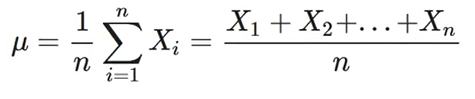

Onde:
 -   **n** = número de observações *(registros)*
 -   **Xi** = valor da i-ésima observação *(registro)*  

In [37]:
#verifica a média do tempo de entrega
df.tempo_entrega.mean()

np.float64(10.043535)

In [38]:
#atribuindo o valor da média de entrega a uma variável
media_entrega = df.tempo_entrega.mean()
media_entrega

np.float64(10.043535)

#### ***A média é sempre a melhor forma de resumir os dados***?

A resposta é **não**! Por ser um ponto de equilíbrio, em algumas análises ela pode não ser a forma mais correta de indicar a tendência central.
Isto porque, ela é muito influenciada pelos extremos da distribuição. Entretanto, com outras informações aliadas à média podemos tirar boas conclusões e investigar se precisamos ou não de algum tratamento e/ou transformação de dado.

In [39]:
#calcular a média por categoria
media_entrega_cat = df.groupby('categoria_produto')['tempo_entrega'].mean().reset_index().round(1)
media_entrega_cat

,categoria_produto,tempo_entrega
0,Alimentos e Bebidas,7.7
1,Beleza e Cuidados Pessoais,8.9
2,Brinquedos,10.1
3,Casa e Mobílias,14.4
4,Eletrônicos,7.2
5,Esporte e Lazer,10.7
6,Ferramentas e Construção,13.6
7,Livros,9.5
8,Papelaria e Escritório,12.0
9,"Roupas, Calçados e Acessórios",9.2


In [40]:
#renomeando a coluna
media_entrega_cat.columns = ['categoria_produto', 'media_tempo']
#ordenando os dados
media_entrega_cat = media_entrega_cat.sort_values(by='media_tempo', ascending=False)
media_entrega_cat

,categoria_produto,media_tempo
3,Casa e Mobílias,14.4
6,Ferramentas e Construção,13.6
8,Papelaria e Escritório,12.0
5,Esporte e Lazer,10.7
2,Brinquedos,10.1
7,Livros,9.5
9,"Roupas, Calçados e Acessórios",9.2
1,Beleza e Cuidados Pessoais,8.9
0,Alimentos e Bebidas,7.7
4,Eletrônicos,7.2


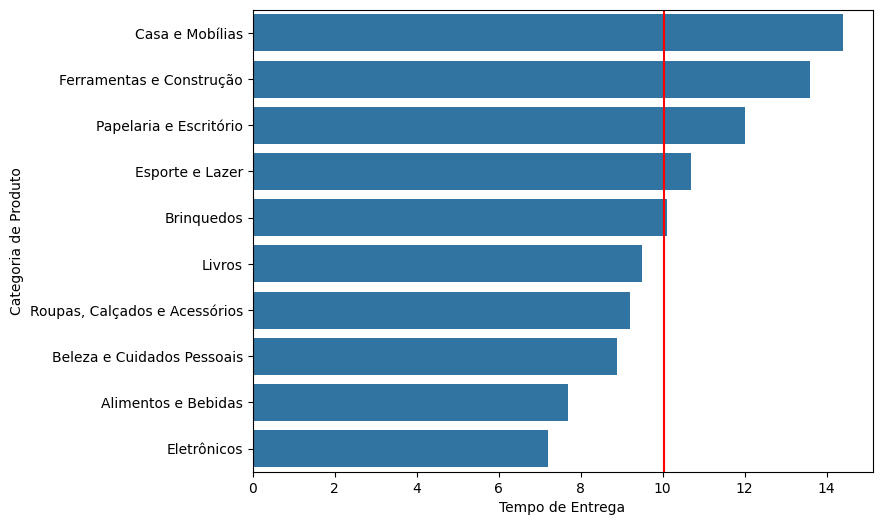

In [41]:
#plotando um gráfico a partir dos dados obtidos acima
plt.figure(figsize= (8,6))
sns.barplot(data=media_entrega_cat, x='media_tempo', y='categoria_produto')
plt.axvline(media_entrega, color='red')

plt.xlabel('Tempo de Entrega')
plt.ylabel('Categoria de Produto')

plt.show()

Como a empresa não possuia informações precisas sobre como os tempos de entrega variam entre as categorias de produtos, isso dificultava a definição de estimativas para os clientes, gerando frustrações quando o tempo real de entrega não corresponde ao esperado.

Aqui conseguimos apontar os gargalos e quais as categorias que precisam de atenção. Seja pela dificuldade de transporte ou outros problemas.

### Demanda 5: **Vendas de eletrônicos na região Nordeste**

Para nossa nova demanda, a divisão da equipe de marketing e vendas que cuida das vendas no Nordeste está buscando investigar o **comportamento dos consumidores** nessa área, devido ao crescimento significativo nas vendas de **Eletrônicos**. A equipe deseja entender melhor a distribuição dos valores de vendas para **ajustar sua estratégia** de preços e campanhas.

Embora a média das vendas de eletrônicos forneça uma visão geral, ela pode ser influenciada por valores extremos, como compras muito altas ou muito baixas.

Para capturar um retrato mais representativo do comportamento típico dos consumidores, podemos utilizar a **mediana**.

### **Mediana**

A **mediana** representa o valor central de um conjunto de dados, passando o número que divide um conjunto de dados exatamente ao meio.
Para obtermos a mediana de um conjunto de dados devemos proceder da seguinte maneira:

1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados(n);
3. Identificar o elemento mediano.
4. Obter a mediana.

### **Solução**:
#### Usando a fórmula

In [46]:
#ordenando o conjunto de dados
dados_nordeste = df[(df['regiao_cliente'] == 'Nordeste') & (df['categoria_produto'] == 'Eletrônicos')]
dados_nordeste = dados_nordeste.sort_values('total_compra')
dados_nordeste

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
78891,b398ddb6-2790-443a-9d32-15ff5778ca19,Feminino,25,Nordeste,Eletrônicos,25.35,1,25.35,9,3,Regular
36398,76f5e991-cf96-4b4c-b6f5-4f84e763fdb9,Feminino,26,Nordeste,Eletrônicos,26.34,1,26.34,9,3,Regular
71461,689e13d1-85f7-44ac-997f-e46ed8c1fdde,Feminino,34,Nordeste,Eletrônicos,29.85,1,29.85,7,5,Ótimo
112356,b2878a8d-e3cc-40af-a46c-d9ae1b8e3aa6,Feminino,27,Nordeste,Eletrônicos,30.09,1,30.09,4,5,Ótimo
29317,23e748d7-2f72-4c3c-97ce-ac9fc5624ea8,Feminino,39,Nordeste,Eletrônicos,32.92,1,32.92,6,2,Ruim
...,...,...,...,...,...,...,...,...,...,...,...
83646,423287e9-e076-4e32-b1b2-75ed2102c8f3,Feminino,35,Nordeste,Eletrônicos,1983.13,10,19831.30,3,5,Ótimo
24720,54a9c744-4dfe-4943-9166-2448c619e787,Masculino,33,Nordeste,Eletrônicos,2007.45,10,20074.50,7,5,Ótimo
25798,cbefed8b-db8a-4c26-b7fa-0133cc82dd8d,Masculino,50,Nordeste,Eletrônicos,2012.22,10,20122.20,5,5,Ótimo
154275,4de22f75-824b-49a2-a758-c9e98d072c1e,Masculino,53,Nordeste,Eletrônicos,2021.43,10,20214.30,9,1,Péssimo


In [48]:
#obter o número de observações
n = len(dados_nordeste)
n

8872

In [50]:
#identificando o elemento mediano
elemento_md = int(n / 2)
elemento_md

4436

In [51]:
# Calculando a média entre o valor no índice 'elemento_md' e o próximo valor
round((dados_nordeste['total_compra'].iloc[elemento_md - 1] + dados_nordeste['total_compra'].iloc[elemento_md]) / 2,2)

np.float64(2989.62)

#### **Usando a função median()**

In [52]:
dados_nordeste.total_compra.median()

np.float64(2989.62)

In [53]:
#obtendo o resultado da média apenas para comparar a diferença
dados_nordeste.total_compra.mean()

np.float64(3969.225537646528)

#### ***Por que usar a mediana ao invés da média neste caso***?

Porque a **média** pode ser influenciada por valores extremos, enquanto a **mediana** reflete o ponto central das vendas, oferecendo uma medida de tendência central mais adequada em casos de dados assimétricos.

A mediana indica aqui que metade dos clientes gasta até, aproximadamente, **2.990,00 reais** em eletrônicos, enquanto a média (**3.970,00**) sugere que há vendas bastante altas, puxando o valor médio para cima.

### **Visualizando a diferença graficamente**

Para visualizar essa discrepância entre os dados, vamos criar um gráfico chamado **histograma**. Ele é uma espécie de gráfico de barras que demonstra uma distribuição de frequências.

No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.

<function matplotlib.pyplot.show(close=None, block=None)>

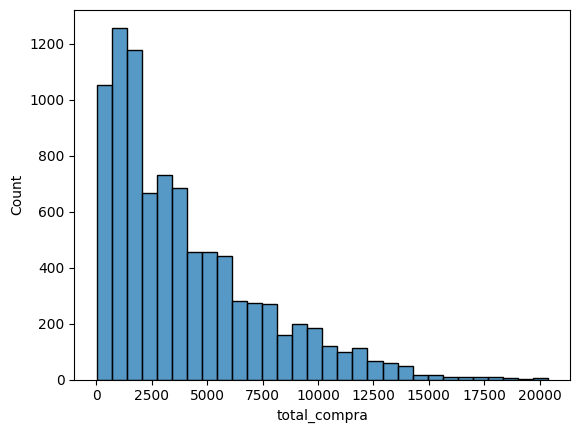

In [55]:
#plotando o gráfico
sns.histplot(dados_nordeste.total_compra, bins=30)
plt.show

Como os dados de vendas de eletrônicos tiveram valores muito altos, o que elevou a média para **uma diferença de quase R$ 1.000,00** em relação à mediana, a mediana oferece uma métrica mais confiável para entender o comportamento típico do consumidor.

Neste caso, a mediana seria o ideal para reportar ao time de vendas como valor esperado de compra das pessoas clientes da empresa na Região Nordeste para produtos eletrônicos.

Essa informação pode auxiliar em estratégias de vendas como, por exemplo:
1. Criar promoções em produtos na faixa da mediana para atrair mais consumidores "**típicos**"
2. Destacar os produtos de alto valor nas campanhas de marketing para atingir clientes dispostoa a gastar mais.

### Demanda 6: **Campanha promocional de livros**

A equipe de marketing e vendas da empresa em que estamos prestando consultoria, está planejando uma nova campanha promocional de **"Pague X e Leve Y Livros"**. Para definir a quantidade de livros a ofertar no pacote, eles decidiram basear-se na **quantidade de livros mais frequentemente comprada** pelos clientes. Isso permite criar uma promoção direcionada ao **comportamento mais comum dos consumidores**.

Precisamos então identificar qual ou quais quantidades de livros são mais frequentes para a campanha, maximizando a relevância e atratividade da promoção.

### **Solução**:
### **Moda**

A **moda** representa o valor mais frequente de um conjunto de dados. Para obtermos a moda, basta observar a frequência com que os valores aparecem no conjunto de dados.
Esta medida é bastante utilizada para dados qualitativos, mas também tem aplicações em dados numéricos como em nosso exemplo.

In [57]:
#filtrando o conjunto de dados
dados_filtrados = df[df['categoria_produto'] == 'Livros']
dados_filtrados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
11,b0494b41-df5b-488f-b305-43dda2916737,Feminino,24,Centro-Oeste,Livros,300.07,2,600.14,10,4,Bom
60,7c1da24d-871d-4a84-a21b-b25ad422676a,Masculino,44,Sudeste,Livros,177.15,2,354.30,11,1,Péssimo
61,7dd0a745-207a-41bc-a3bf-c5ff6e1cd274,Masculino,47,Sudeste,Livros,354.72,1,354.72,9,3,Regular
83,fa44d7e6-e17b-4fef-8326-e9b3035699e5,Masculino,35,Sul,Livros,116.94,3,350.82,16,3,Regular
92,399a3765-c43e-434f-b9eb-8cb7eb4a21ff,Feminino,26,Sul,Livros,129.11,4,516.44,10,4,Bom


#### **Quais cuidados devemos tomar com a moda**?

Por ser o valor mais frequente em um conjunto de dados, em **dados numéricos** é possível que haja repetições e, por isso, teremos mais de 1 moda **(multimodalidade)**

É importante decidir como lidar com esses casos para atingir o comportamento desejado.

In [58]:
moda = dados_filtrados.quantidade.mode()
moda

0    2
1    4
Name: quantidade, dtype: int64

Conseguimos observar aqui que temos **2 modas** na quantidade de livros vendidos (**bimodal**)e, portanto, podemos reportar esse resultado ficando a cargo da empresa qual campanha realizar.